# Exercise Session 8 – Data visualization in Python
### ENV–501 Material and Energy Flow Analysis

November 21st, 2024

Content updated by Jair Campfens

1. Bar and line plots
2. Sankey diagram for the European Union
3. Plotting colored maps

#### Sources:
- [Data Eurostat](https://ec.europa.eu/eurostat/databrowser/view/env_ac_sd/default/table?lang=en)
- [Eurostat Sankey diagram](https://ec.europa.eu/eurostat/cache/sankey/circular_economy/sankey.html?geos=EU27&year=2020&unit=G_T&materials=TOTAL&highlight=0&nodeDisagg=0101100100&flowDisagg=false&translateX=200&translateY=70&scale=0.7&language=EN&xyz=89&material=TOTAL)
- [plotly library](https://plotly.com/python/sankey-diagram/)
- [Map visualization tutorial](https://jan-46106.medium.com/plotting-maps-with-european-data-in-python-part-i-decd83837de4)
- [GISCO statistical unit dataset (NUTS)](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts#nuts21)


#### Install the required pandas

conda install -c plotly plotly=5.11.0

conda install geopandas -c conda-forge

conda install seaborn -c conda-forge

In [ ]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('env_ac_sd_spreadsheet.xlsx',
                        sheet_name = "Sheet 2",
                        header = [9],
                        index_col= [0],
                        skiprows= [10,41,42,43],
                        usecols = [0,1,3,5,7,9,11,13,15,17,19])
data.style.set_caption("Imports excluding imports of waste for recovery  [Thousannd Tonnes] (Fossil energy material/carriers)")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# dictionary to improve labelling
countries_short = ['EU (2020)', 'EU (pre-2020)', 'BE', 'BG', 'CZ', 'DK', 'DE', 'ES',
                   'IE', 'GR', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU','HU',
                   'MT','NL','AT','PL','PT', 'RO','SI','SK','FI','SE','UK']
dict_countries = {i:countries_short[n] for n,i in enumerate(data.index)}

Mismatch between data and country labels. Check data.


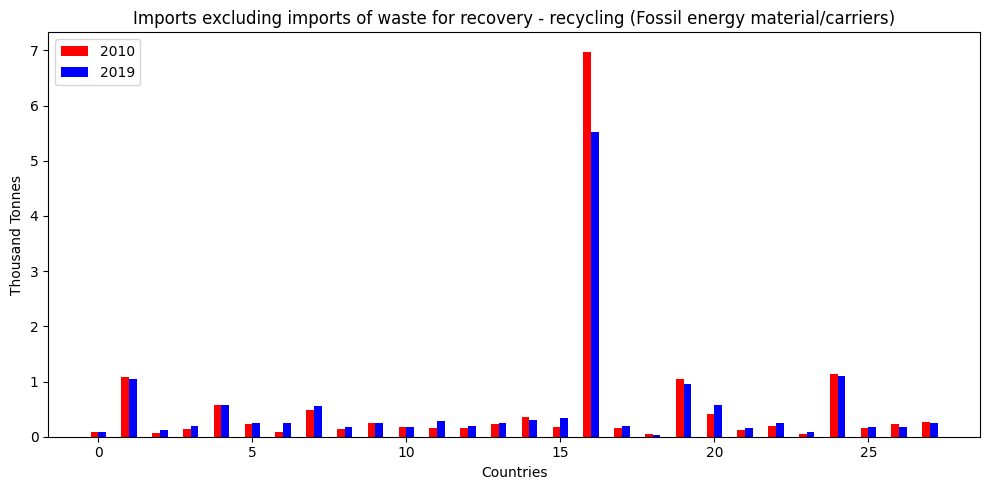

In [ ]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Width of the bars
width = 0.25

# Define x-axis positions
dx = width / 2
x1 = np.arange(len(data.index)) - dx
x2 = np.arange(len(data.index)) + dx

# Plot the bars
ax.bar(x1, data['2010'], width, color='red', label='2010')
ax.bar(x2, data['2019'], width, color='blue', label='2019')

# Set title, x and y labels
ax.set_title('Imports excluding imports of waste for recovery - recycling (Fossil energy material/carriers)')
ax.set_xlabel('Countries')
ax.set_ylabel('Thousand Tonnes')

# Set x ticks and labels
if len(data.index) == len(dict_countries.values()):
    ax.set_xticks(np.arange(len(data.index)))
    ax.set_xticklabels(dict_countries.values(), rotation=90, fontsize=10)
else:
    print("Mismatch between data and country labels. Check data.")

# Add a legend
ax.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Skipping Sweden due to duplicate or non-unique entry in the data.


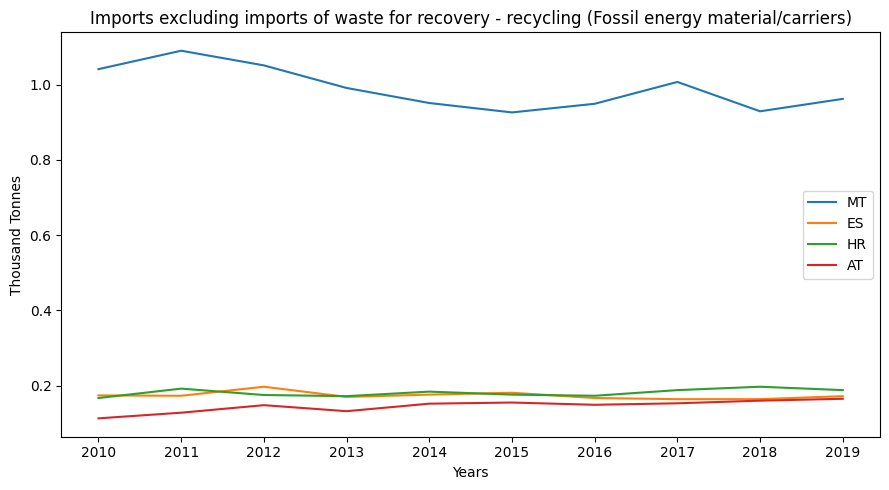

In [ ]:
# line plot
# plot the trend of the indicator per country over the past 10 years

# initialize the figure
fig, ax = plt.subplots(figsize=(9, 5))

# plot the line
for country in ['Netherlands', 'France', 'Italy', 'Sweden', 'Poland']:
    try:
        # Attempt to get the location by label
        loc = data.index.get_loc(country)
        # Check if the location is a single integer (unique label)
        if isinstance(loc, int):
            ax.plot(data.columns, data.loc[country, :], label=dict_countries[country])
        # If the location is a slice or array (duplicate or partial match), skip
        else:
            print(f"Skipping {country} due to duplicate or non-unique entry in the data.")
    except KeyError:
        print(f"Skipping {country} due to missing entry in the data.")

# set title, x and y labels
ax.set_title('Imports excluding imports of waste for recovery - recycling (Fossil energy material/carriers)')
ax.set_xlabel('Years')
ax.set_ylabel('Thousand Tonnes')

# add a legend
ax.legend()

plt.tight_layout()
plt.show()

### Sankey diagram

Replicate the Sankey diagram for the European Union (27 countries) 2023 reported by [Eurostat](https://ec.europa.eu/eurostat/cache/sankey/circular_economy/sankey.html?geos=EU27&year=2020&unit=G_T&materials=TOTAL&highlight=0&nodeDisagg=0101100100&flowDisagg=false&translateX=200&translateY=70&scale=0.7&language=EN&xyz=89&material=TOTAL) using the python lybrary [plotly](https://plotly.com/python/sankey-diagram/).

Acronyms used:

* 'IMP_RCV_R': 'Imports of waste for recovery - recycling'
* 'IMP_X_RCV_R':'Imports excluding imports of waste for recovey - recycling',
* 'EXP_RCV_R':'Exports of waste for recovery - recycling',
* 'EXP_X_RCV_R':'Exports exclusing exports of waste for recovery - recycling',
* 'DMI_RCV_R_B':'Processed material - direct material inputs and recovery',
* 'NAS':'Net additions to stock',
* 'MAT_ACCUM':'Material accumulation',
* 'EMIS':'Emissions',
* 'EMIS_X_WST_IN':'Emissions excluding emissiond from incineration of waste',
* 'EMIS_AIR_NBI':'Emissions to air - net of balancing items',
* 'EMIS_WTR':'Emissions to water',
* 'DFLOW':'Dissipative flows',
* 'MAT_USE':'Material use',
* 'NRS':'Net reduction to stock'  

In [ ]:
# import required packages
import plotly.graph_objects as go

In [ ]:
# import the data dowloaded from the Eurostat website

In [ ]:
# rearrange the data

# create a dictionary with flows as keys and a tuple(source, target, value) as values
flows_dict = {'IMP_RCV_R - IMP':('IMP_RCV_R','IMP',data.loc['IMP_RCV_R','value']),
              'IMP_X_RCV_R - IMP':('IMP_X_RCV_R','IMP',data.loc['IMP_X_RCV_R','value']),
              'IMP - DMI':('IMP','DMI',np.nan),
              'NRE - DMI':('NRE','DMI',np.nan),
              'DMI - DMI_RCV_R_B':('DMI','DMI_RCV_R_B',np.nan),
              'DMI_RCV_R_B - EXP':('DMI_RCV_R_B','EXP',np.nan),
              'DMI_RCV_R_B - DFLOW':('DMI_RCV_R_B','DFLOW',data.loc['DFLOW','value']),
              'DMI_RCV_R_B - EMIS':('DMI_RCV_R_B','EMIS',data.loc['EMIS_X_WST_INC','value']),
              'DMI_RCV_R_B - MAT_USE':('DMI_RCV_R_B','MAT_USE',data.loc['MAT_USE','value']),
              'EXP - EXP_RCV_R':('EXP','EXP_RCV_R',data.loc['EXP_RCV_R','value']),
              'EXP - EXP_X_RCV_R':('EXP','EXP_X_RCV_R',data.loc['EXP_X_RCV_R','value']),
              'EMIS - EMIS_AIR_NBI':('EMIS','EMIS_AIR_NBI',data.loc['EMIS_AIR_NBI','value']),
              'EMIS - EMIS_WTR':('EMIS','EMIS_WTR',data.loc['EMIS_WTR','value']),
              'MAT_USE - WST':('MAT_USE','WST',np.nan),
              'MAT_USE - MAT_ACCUM':('MAT_USE','MAT_ACCUM',data.loc['MAT_ACCUM','value']),
              'WST - EMIS':('WST','EMIS',np.nan),
              'WST - WST_LANDFILL':('WST','WST_LANDFILL',np.nan),
              'WST - RCV':('WST','RCV',np.nan),
              'RCV - DMI_RCV_R_B':('RCV','DMI_RCV_R_B',np.nan),
             }


flows = pd.DataFrame(flows_dict).T
flows.columns = ['source','target','value']

KeyError: 'IMP_RCV_R'

In [ ]:
# Fill the missing values

# Total imports (IMP): sum of imports
flows.loc['IMP - DMI','value'] = flows.loc['IMP_RCV_R - IMP','value'] + flows.loc['IMP_X_RCV_R - IMP','value']

# Exports (EXP): sum of exports
flows.loc['DMI_RCV_R_B - EXP','value']  = flows.loc['EXP - EXP_RCV_R','value'] + flows.loc['EXP - EXP_X_RCV_R','value']

# Incineration
flows.loc['WST - EMIS','value'] = data.loc['EMIS','value'] - flows.loc['DMI_RCV_R_B - EMIS','value']

# Waste treatement (WST): Mat. use - Mat. accumulation
flows.loc['MAT_USE - WST','value'] = flows.loc['DMI_RCV_R_B - MAT_USE','value']- flows.loc['MAT_USE - MAT_ACCUM','value']

# Domestic material inputs (DMI): Process. material - recovery
flows.loc['DMI - DMI_RCV_R_B','value'] = data.loc['DMI_RCV_R_B','value'] - data.loc['RCV','value']

# Natural resource extracted (NRE): DMI - IMP
flows.loc['NRE - DMI','value'] = flows.loc['DMI - DMI_RCV_R_B','value'] - flows.loc['IMP - DMI','value']

# Recovered material: processed material - DMI
flows.loc['WST - RCV','value'] = data.loc['DMI_RCV_R_B','value'] - flows.loc['DMI - DMI_RCV_R_B','value']

# recovered to processed material
flows.loc['RCV - DMI_RCV_R_B','value'] = flows.loc['WST - RCV','value']

# Landill
flows.loc['WST - WST_LANDFILL','value'] = flows.loc['MAT_USE - WST','value'] - flows.loc['WST - EMIS','value'] - flows.loc['WST - RCV','value']
flows

In [ ]:
# basic plot

all_indicators = list(set(list(set(flows.loc[:,'source'])) + list(set(flows.loc[:,'target']))))
dict_indicators = {i:n for n,i in enumerate(all_indicators)}
labels = list(dict_indicators.keys())

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
    ),
    link = dict(
      source = list(flows.source.replace(dict_indicators).values),  # indices correspond to labels
      target = list(flows.target.replace(dict_indicators).values),
      value = list(flows.value.values)
  ))])

fig.update_layout(title_text="Material Flow Sankey Diagram for European Union (27 countries) 2020", font_size=10)
fig.show()

In [ ]:
# customized nodes position

labels = {'IMP_X_RCV_R':(0.01,0.01),
          'IMP_RCV_R':(0.01,0.2),
          'IMP':(0.1,0.1),
          'NRE':(0.1,0.6),
          'DMI':(0.2,0.47),
          'DMI_RCV_R_B':(0.3,0.5),
          'MAT_USE':(0.4,0.6),
          'RCV':(0.7,0.6),
          'MAT_ACCUM':(0.6,0.75),
          'WST':(0.6,0.48),
          'EMIS':(0.7,0.3),
          'EXP':(0.7,0.06),
          'DFLOW':(0.8,0.15),
          'EMIS_AIR_NBI':(0.8,0.3),
          'EMIS_WTR':(0.8,0.4),
          'WST_LANDFILL':(0.8,0.45),
          'EXP_RCV_R':(0.9,0.01),
          'EXP_X_RCV_R':(0.9,0.1)
         }

dict_indicators = {i:n for n,i in enumerate(labels.keys())}

fig = go.Figure(data=[go.Sankey(
    arrangement="freeform",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label = list(labels.keys()),
      x = [i[0] for i in labels.values()],
      y = [i[1] for i in labels.values()]
    ),
    link = dict(
      source = list(flows.source.replace(dict_indicators).values),  # indices correspond to labels
      target = list(flows.target.replace(dict_indicators).values),
      value = list(flows.value.values)
  ))])

fig.update_layout(title_text="Material Flow Sankey Diagram for European Union (27 countries) 2020", font_size=10)
fig.show()

### European maps

European level map of any indicator.

In [ ]:
# import the required packages
import geopandas as gpd
#import contextily as ctx

In [ ]:
# load data
data_dir = r"ref-nuts-2021-01m/"

# regions
path_rg = data_dir + "NUTS_RG_01M_2021_3035_LEVL_0.json"
gdf_rg = gpd.read_file(path_rg)

# boundaries
path_bn = data_dir + "NUTS_BN_01M_2021_3035_LEVL_0.json"
gdf_bn = gpd.read_file(path_bn)

# single point per area " for labeling"
path_lb = data_dir + "NUTS_LB_2021_3035_LEVL_0.json"
gdf_lb = gpd.read_file(path_lb)

In [ ]:
# Show that geopandas is a DataFrame with a geometry column
gdf_rg

In [ ]:
# plot map of europe

# Initialize the figure
fig, ax = plt.subplots(figsize = (10,10))

# plot
gdf_rg.plot(ax=ax, color="gray")
gdf_bn.plot(ax=ax, linewidth=0.5, color="red")
gdf_lb.plot(ax=ax, color="yellow")

# title
ax.set(title='European countries')

# remove axis and show figure
ax.set_axis_off()
plt.show()

In [ ]:
# plot a geaograhical heatmap
import matplotlib

# import the data downloaded from Eurostat
data = pd.read_excel('env_ac_sd__custom_3743834_spreadsheet.xlsx',
                        sheet_name = "Sheet 2",
                        header = [9],
                        index_col= [0],
                        skiprows= [10,41,42,43],
                        usecols = [0,1,3,5,7,9,11,13,15,17,19])

# map countries IDs with extended name
countries_short = ['EU (2020)', 'EU (pre-2020)', 'BE', 'BG', 'CZ', 'DK', 'DE', 'ES',
                   'IE', 'GR', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU','HU',
                   'MT','NL','AT','PL','PT', 'RO','SI','SK','FI','SE','UK']
dict_countries = {countries_short[n]:i for n,i in enumerate(data.index)}

# rearrange the data
cmap = sns.color_palette("vlag", as_cmap=True)

dict_data = {}
for ID in gdf_rg.NUTS_ID:
    if ID in countries_short:
        dict_data[ID] = data.loc[dict_countries[ID],'2019']
    else:
        dict_data[ID] = 0
grey = (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)
colors = [cmap(dict_data[ID]/max(dict_data.values())) if ID in countries_short else grey for ID in gdf_rg.NUTS_ID]


# Initialize the figure
fig, ax = plt.subplots(figsize = (10,10))

gdf_rg.plot(ax=ax, color=colors)
gdf_bn.plot(ax=ax, color="k", legend=True)

# Focus the plotting on continental Europe
ax.set_xlim(2*10**6,8*10**6)
ax.set_ylim(1*10**6,6*10**6)

# include a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=min(dict_data.values()), vmax=max(dict_data.values())))
sm._A = []
cbar = plt.colorbar(sm, fraction=0.03)
cbar.set_label('[Thousand tonnes]', rotation=90)

# Title
ax.set_title('Imports excluding imports of waste for recovery - Fossil energy material/carriers')

plt.tight_layout()
plt.show()


In [ ]:
# plot NUTS 2

# import data
path = data_dir + "NUTS_RG_01M_2021_3035_LEVL_2.json"
gdf = gpd.read_file(path) # specify CRS (see the filename)
gdf.crs = "EPSG:3035"

colors = sns.color_palette("Set2",3)

# Initialize the figure
fig, ax = plt.subplots(figsize = (10,10))

# extract the data
gdf_dach = gdf[(gdf.CNTR_CODE == "DE") | (gdf.CNTR_CODE == "AT") | (gdf.CNTR_CODE == "CH")]
gdf_at = gdf[(gdf.CNTR_CODE == "AT")]
gdf_ch = gdf[(gdf.CNTR_CODE == "CH")]
gdf_de = gdf[(gdf.CNTR_CODE == "DE")]

# plot regions
gdf_de.plot(ax=ax, color=colors[0])
gdf_at.plot(ax=ax, color=colors[1])
gdf_ch.plot(ax=ax, color=colors[2])

# label points
gdf_lb[(gdf_lb.CNTR_CODE == "DE")].plot(ax=ax, color=colors[0], label='DE', legend=True)
gdf_lb[(gdf_lb.CNTR_CODE == "AT")].plot(ax=ax, color=colors[1], label='AT', legend=True)
gdf_lb[(gdf_lb.CNTR_CODE == "CH")].plot(ax=ax, color=colors[2], label='CH', legend=True)

# plot boundaries
gdf_dach.boundary.plot(color="k", ax=ax)

# title
ax.set(title='DACH countries')

# show legend
ax.legend()

# remove axis and show figure
ax.set_axis_off()
plt.show()